Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [1]:
# https://github.com/shaiel60/MachineLearningCourse-Ex3
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

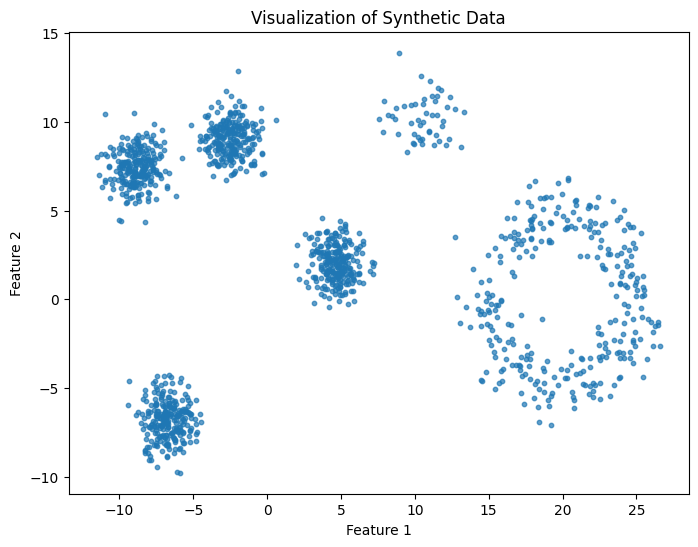

In [47]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

import matplotlib.pyplot as plt

X = create_data(1.0, 1000, 50, 300, 200)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.title("Visualization of Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_range = range(2, 11)
silhouette_scores = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, init="random", max_iter=500,verbose=5)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k ,init="random", max_iter=500, verbose=5)
kmeans_labels = kmeans.fit_predict(X)

print(f"Optimal number of clusters: {optimal_k}")

Initialization complete
Iteration 0, inertia 124859.03261001002.
Iteration 1, inertia 90281.42224749803.
Iteration 2, inertia 90007.7247707463.
Iteration 3, inertia 89921.37888349588.
Iteration 4, inertia 89823.66501601896.
Iteration 5, inertia 89538.02804904406.
Iteration 6, inertia 89014.31982756717.
Iteration 7, inertia 86976.69343802836.
Iteration 8, inertia 83859.3968636753.
Iteration 9, inertia 83253.82629366395.
Iteration 10, inertia 83213.38220630205.
Converged at iteration 10: center shift 0.0018206910977751696 within tolerance 0.007816900389080656.
Initialization complete
Iteration 0, inertia 139571.1803581648.
Iteration 1, inertia 84255.989607587.
Iteration 2, inertia 83258.8331499221.
Iteration 3, inertia 83223.08406257442.
Iteration 4, inertia 83213.37549995718.
Converged at iteration 4: center shift 0.0017915916833374664 within tolerance 0.007816900389080656.
Initialization complete
Iteration 0, inertia 285687.59313269134.
Iteration 1, inertia 136039.79840363248.
Iteratio

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


cluster_range = range(2, 50)
silhouette_scores = []


for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = agg_clustering.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

print(f"Optimal number of clusters: {optimal_n_clusters}")

Optimal number of clusters: 6


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.999, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
labels = dbscan.labels_

print(labels)

[0 1 1 ... 5 5 5]


6. Compare the results and choose the best method for the data


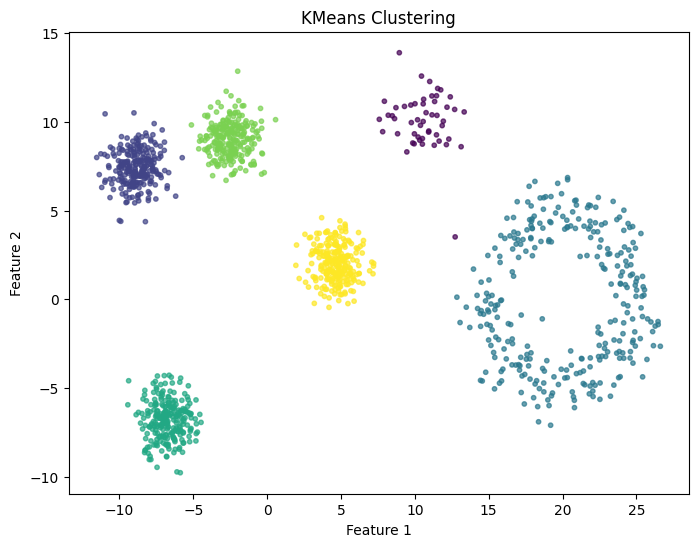

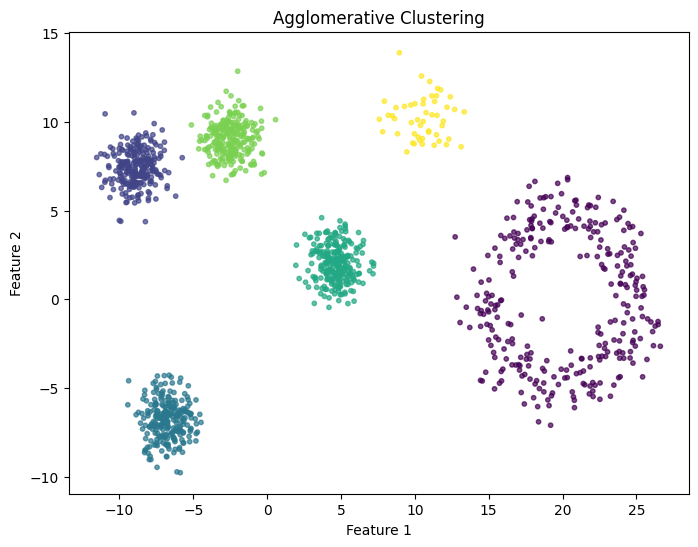

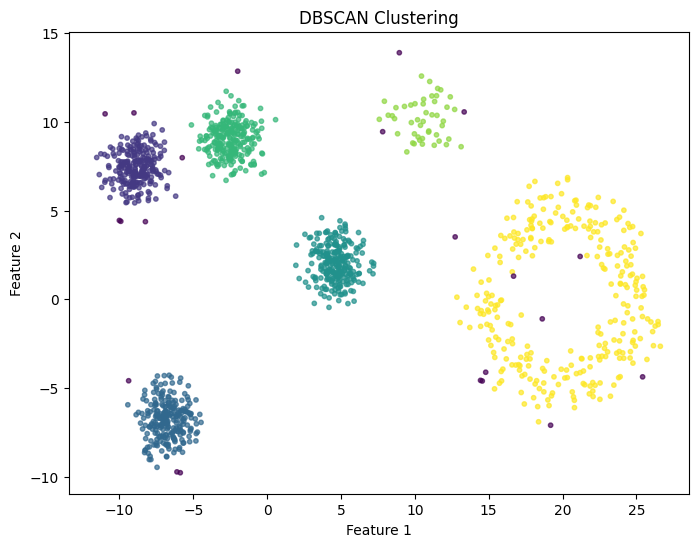

KMeans Silhouette Score: 0.7251181630059241
Agglomerative Clustering Silhouette Score: 0.7256900714288006
DBSCAN Silhouette Score: 0.7070123298589694


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

#KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# agglomerative
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Silhouette Score Comparison:

kmeans_silhouette = silhouette_score(X, kmeans_labels)
agg_silhouette = silhouette_score(X, agg_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

